In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy

Found 201 images belonging to 3 classes.


Found 13 images belonging to 3 classes.


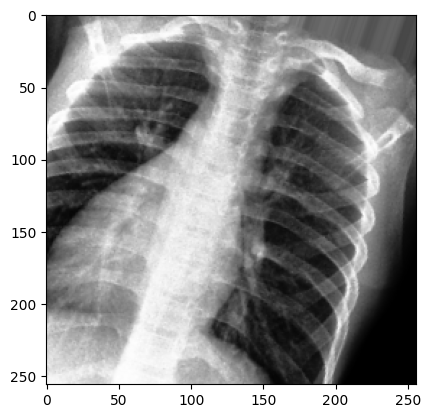

In [13]:
# load and augment data
train_dir = '/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/train'
test_dir = '/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/test'

# normalize pixel values and rotate, shift, zoom, flip images to increase diversity
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train = img_gen.flow_from_directory(
    train_dir,
    target_size = (256, 256), # 256x256
    batch_size = 32, 
    class_mode = 'categorical', # multi-class classification
    subset = 'training'
)
test = img_gen.flow_from_directory(
    test_dir,
    target_size = (256, 256), # 256x256
    batch_size = 32, 
    class_mode = 'categorical', # multi-class classification
    subset = 'validation'
)
xrays, labels = train[0]
plt.imshow(xrays[0])
plt.show()

In [12]:
print(xrays[0].shape, labels[0].shape)

(256, 256, 3) (3,)


In [20]:
# building CNN model, trying 3 convolutional layers, 1 dense layer, 1 output layer

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# loss function: multi-class classification -> multi-class crossentropy
# optimizer: adam
# learning rate: 0.001 (small dataset)
# activation function: relu (hidden layers), sigmoid or softmax (output layer)
# metrics: accuracy

model = Sequential()

# convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2, 2))

# convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2, 2))

# convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2, 2))

# flattening to feed into dense layer
model.add(Flatten())

# dense layer
model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(3, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# trying with 10 epochs
model.fit(train, validation_data=test, epochs=10)

Epoch 1/10


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 708ms/step - accuracy: 0.3391 - loss: 2.9115 - val_accuracy: 0.3077 - val_loss: 1.0753
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 611ms/step - accuracy: 0.4834 - loss: 1.0600 - val_accuracy: 0.6154 - val_loss: 0.8784
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 511ms/step - accuracy: 0.6580 - loss: 0.8268 - val_accuracy: 0.6154 - val_loss: 0.8614
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - accuracy: 0.6800 - loss: 0.6819 - val_accuracy: 0.6154 - val_loss: 0.7384
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 710ms/step - accuracy: 0.6548 - loss: 0.8061 - val_accuracy: 0.6923 - val_loss: 1.2821
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 709ms/step - accuracy: 0.6464 - loss: 0.7458 - val_accuracy: 0.8462 - val_loss: 0.6774
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 574ms/step - accuracy: 0.7594 - loss: 0.7265 - val_accuracy: 0.7692 - val_loss: 0.5380
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7140 - loss: 0.6265 - val_accuracy: 0.9231 - val_loss: 0.3874
Epoch 

In [21]:
# final evaluation: 80% accuracy on train, 76% accuracy on test. Not great, but not bad for a first try.

# trying with 20 epochs
model.fit(train, validation_data=test, epochs=20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 792ms/step - accuracy: 0.3891 - loss: 4.5620 - val_accuracy: 0.3077 - val_loss: 1.0945
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 594ms/step - accuracy: 0.4135 - loss: 1.0560 - val_accuracy: 0.5385 - val_loss: 0.8964
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 695ms/step - accuracy: 0.6552 - loss: 0.7634 - val_accuracy: 0.7692 - val_loss: 0.7945
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 637ms/step - accuracy: 0.7050 - loss: 0.7069 - val_accuracy: 0.6923 - val_loss: 0.8070
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 674ms/step - accuracy: 0.8048 - loss: 0.5320 - val_accuracy: 0.6923 - val_loss: 0.5738
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 775ms/step - accuracy: 0.8055 - loss: 0.4672 - val_accuracy: 0.5385 - val_loss: 1.2664
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 695ms/step - accuracy: 0.6601 - loss: 0.7653 - val_accuracy: 0.8462 - val_loss: 0.6566
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 664ms/step - accuracy: 0.6804 - loss: 0.6669 - val_accuracy: 0.6923 - val_loss:

In [25]:
# huge range of accuracy: 30-80% on train, 30-00% on test. model is not stable and might be overfitting.

# to fix instability: lowering learning rate to 0.0001 and adding regularization (dropout, l2, batch normalization)
# if this doesn't work, using early stop and increasing batch size

from keras.layers import BatchNormalization
from keras.regularizers import l2
model2 = Sequential()

# convolutional layer 1 with normalization
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(0.0001)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2, 2))

# convolutional layer 2 with normalization
model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(0.0001)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2, 2))

# convolutional layer 3 with normalization
model2.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=keras.regularizers.l2(0.0001)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2, 2))

# flattening to feed into dense layer
model2.add(Flatten())

# dense layer and dropout
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5)) # 50% dropout

# output layer (using softmax instead of sigmoid this time)
model2.add(Dense(3, activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,259 (56.61 MB)

 Trainable params: 14,839,811 (56.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [26]:
model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 636ms/step - accuracy: 0.8391 - loss: 0.4396 - val_accuracy: 0.7692 - val_loss: 0.5898
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 586ms/step - accuracy: 0.8571 - loss: 0.3784 - val_accuracy: 0.8462 - val_loss: 0.4141
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 600ms/step - accuracy: 0.8807 - loss: 0.3713 - val_accuracy: 1.0000 - val_loss: 0.2235
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 747ms/step - accuracy: 0.8388 - loss: 0.3662 - val_accuracy: 0.8462 - val_loss: 0.3836
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 612ms/step - accuracy: 0.7778 - loss: 0.4388 - val_accuracy: 0.8462 - val_loss: 0.3444
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 599ms/step - accuracy: 0.8947 - loss: 0.3664 - val_accuracy: 0.8462 - val_loss: 0.3606
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 603ms/step - accuracy: 0.8423 - loss: 0.3876 - val_accuracy: 0.9231 - val_loss: 0.3543
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 702ms/step - accuracy: 0.8616 - loss: 0.3887 - val_accuracy: 0.8462 - val_loss:

In [32]:
# accuracy's looking great! train score: on average between 84-89%, test score: on average between 84-90%

# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# confuxion matrix for true positive, true negative, false positive, false negative
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = np.argmax(model2.predict(test_data), axis=1)
y_true = test_data.classes
c_matrix = confusion_matrix(y_true, y_pred)
print(c_matrix)

# classification report for precision, recall, f1-score
class_report = classification_report(y_true, y_pred, target_names=test_data.class_indices)
print(class_report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.3846 - loss: 1.1150
Test Loss: 1.1149510145187378
Test Accuracy: 0.38461539149284363
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[5 0 0]
 [4 0 0]
 [4 0 0]]
              precision    recall  f1-score   support

       Covid       0.38      1.00      0.56         5
      Normal       0.00      0.00      0.00         4
   Pneumonia       0.00      0.00      0.00         4

    accuracy                           0.38        13
   macro avg       0.13      0.33      0.19        13
weighted avg       0.15      0.38      0.21        13



/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

In [35]:
# confusion matrix and classification report shows all the test data were incorrectly classified as covid-19.

# to improve model, we can try:
# - adding class weights
# - bootstrapping

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_true), 
    y=y_true
)
class_weights = dict(enumerate(class_weights))

class_weights

{0: 0.8666666666666667, 1: 1.0833333333333333, 2: 1.0833333333333333}

In [ ]:
accuracies, losses = [], []

for model in models:
    loss, accuracy = model.evaluate(test)
    accuracies.append(accuracy)
    losses.append(loss)

    # get predictions on test data
    y_pred = np.argmax(model.predict(test), axis=1)
    y_true = test.classes

    report = classification_report(y_true, y_pred, target_names=test.class_indices)
    print(report)
print(f'Average Accuracy: {np.mean(accuracies)}')
print(f'Average Loss: {np.mean(losses)}')

In [55]:
# confusion matrix and classification report shows all the test data were incorrectly classified as covid-19.

# to improve model, we can try:
# - adding class weights
# - bootstrapping


# training 5 models on bootstrapped augmented data with classweights
from keras.models import clone_model
from sklearn.utils.class_weight import compute_class_weight

models = []

# generate bootstrapped samples of size n
def bootstrap_sample(generator, n):
   while True: # will stop once epochs end
      x_boot, y_boot =[], []
      for i in range(n):
         x, y = next(generator) # aggressive data augmentation
         x_boot.append(x)
         y_boot.append(y)
      x_boot, y_boot = np.concatenate(x_boot), np.concatenate(y_boot)

      random_indices = np.random.choice(len(x_boot), len(x_boot), replace=True) # random bootstrapping with replacement
      yield x_boot[random_indices], y_boot[random_indices]


for i, (x_boot, y_boot) in enumerate(bootstrap_sample(train, 5)):
    print(f'Model {i}')
    model = clone_model(model2)
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    class_weights = compute_class_weight( # compute class weights for each bootstrapped sample
    class_weight='balanced', # class weights to improve categorization of minority classes
    classes=np.unique(y_true), 
    y=y_true
   )
    class_weights = dict(enumerate(class_weights))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_boot, y_boot, epochs=10, class_weight=class_weights)
    models.append(model)
    if i == 5: break
      

Model 0
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5038 - loss: 2.5535
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8772 - loss: 0.8034
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9463 - loss: 0.1858
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9323 - loss: 0.8489
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9661 - loss: 0.1179
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9486 - loss: 0.3237
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9786 - loss: 0.1402
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9928 - loss: 0.0414
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9966 - loss: 0.0334
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9923 - loss: 0.0206
Model 1
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4411 - loss: 2.7691
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8527 - loss: 0.8866

In [57]:
accuracies, losses = [], []

for model in models:
    loss, accuracy = model.evaluate(test)
    accuracies.append(accuracy)
    losses.append(loss)

    # get predictions on test data
    y_pred = np.argmax(model.predict(test), axis=1)
    y_true = test.classes

    report = classification_report(y_true, y_pred, target_names=test.class_indices)
    #print(report)
print(f'Average Accuracy: {np.mean(accuracies)}')
print(f'Average Loss: {np.mean(losses)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.3846 - loss: 10.2698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.3846 - loss: 10.0749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.3846 - loss: 12.1649
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.3846 - loss: 4.2689
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.3846 - loss: 6.7067
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.3846 - loss: 2.9204
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Average Accuracy: 0.38461539149284363
Average Loss: 7.734263896942139


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


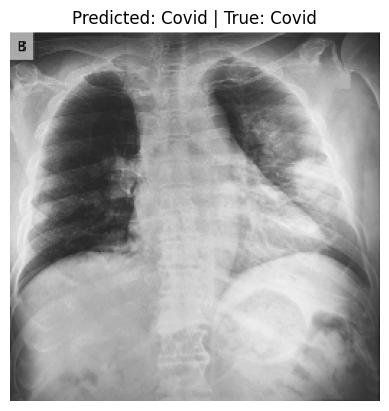

This is a picture of a patient with Covid


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def visualize_prediction(model, img_path, true_label, class_labels):
    # Load the image
    img = load_img(img_path, target_size=(256, 256))
    img_array = img_to_array(img) / 255.0  # Rescale to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Get model prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Plot the image
    plt.imshow(img)
    plt.title(f'Predicted: {class_labels[predicted_class]} | True: {class_labels[true_label]}')
    plt.axis('off')
    plt.show()
    print(f'This is a picture of a patient with {class_labels[predicted_class]}')

# Load an image and visualize its prediction
img_path = '/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/test/Covid/46.png'
true_label = 0  
class_labels = ['Covid', 'Normal', 'Pneumonia']

visualize_prediction(model3, img_path, true_label, class_labels)